In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns" , None)
pd.set_option("display.max_rows" , None)

cr = pd.read_csv("CreditRisk.csv")
df=cr.copy()

In [82]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Problem Statement1 : To create a predictive model which can predict the loan status
# Problem Statement2 : To create a model for running a marketing (sales campaign) for the good customers

In [83]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [84]:
cr.Gender = cr.Gender.fillna("Male")
cr.Married = cr.Married.fillna("Yes")
cr.Dependents = cr.Dependents.fillna(0)
cr.Self_Employed.fillna("Yes", inplace=True)
cr.LoanAmount = cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Loan_Amount_Term = cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
cr.Credit_History = cr.Credit_History.fillna(0)

# EDA

In [123]:
cr.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.00000,981.000000,981.000000,981.000000,981.000000
mean,0.814475,0.646279,0.859327,0.222222,0.177370,5179.795107,1601.916330,142.51153,342.201873,0.768603,1.053007,0.725790
std,0.388921,0.478368,1.247278,0.415952,0.382176,5695.104533,2718.772806,76.34777,64.432886,0.421940,0.801302,0.446343
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,6.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2875.000000,0.000000,101.00000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3800.000000,1110.000000,128.00000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5516.000000,2365.000000,160.00000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,4.000000,1.000000,1.000000,81000.000000,41667.000000,700.00000,480.000000,1.000000,2.000000,1.000000


In [85]:
cr.groupby('Loan_Status')['Property_Area'].value_counts()

Loan_Status  Property_Area
N            Rural            103
             Urban             90
             Semiurban         76
Y            Semiurban        273
             Urban            252
             Rural            187
Name: Property_Area, dtype: int64

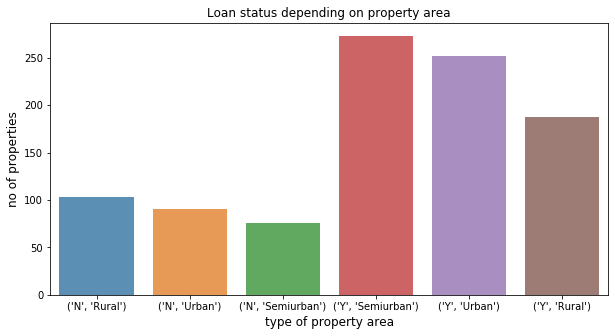

In [86]:
plt.figure(figsize=(10,5))
sns.barplot(cr.groupby('Loan_Status')['Property_Area'].value_counts().index, cr.groupby('Loan_Status')['Property_Area'].value_counts().values, alpha=0.8)
plt.title('Loan status depending on property area')
plt.ylabel('no of properties', fontsize=12)
plt.xlabel('type of property area', fontsize=12)
plt.show()

In [87]:
## can conclude that rural properties are rejected for most loans whereas semiurban gets more prefernece than urban

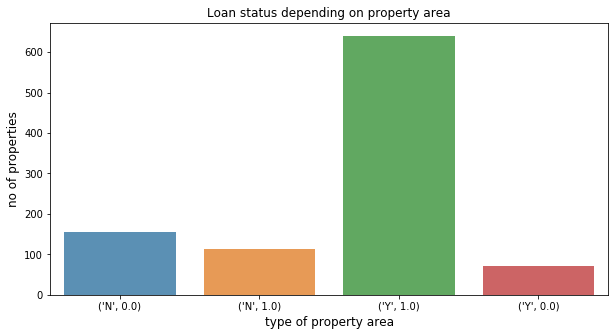

In [88]:
plt.figure(figsize=(10,5))
sns.barplot(cr.groupby('Loan_Status')['Credit_History'].value_counts().index, cr.groupby('Loan_Status')['Credit_History'].value_counts().values, alpha=0.8)
plt.title('Loan status depending on property area')
plt.ylabel('no of properties', fontsize=12)
plt.xlabel('type of property area', fontsize=12)
plt.show()

In [89]:
#shows that credit history plays a mjor role in approving loan status

In [90]:
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [91]:
cr = cr.iloc[ : , 1 : ]

In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cr[cr.select_dtypes(include=['object']).columns] = cr[cr.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
cr_train , cr_test = train_test_split(cr, test_size = .2, random_state = 111)

In [95]:
cr_train_x = cr_train.iloc[ : , 0 : -1 ]
cr_train_y = cr_train.iloc[ : , -1 ]

In [96]:
cr_test_x = cr_test.iloc[ : , 0 : -1 ]
cr_test_y = cr_test.iloc[ : , -1 ]

In [97]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [98]:
logreg.fit(cr_train_x, cr_train_y)

C:\Users\tanma\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [99]:
pred_cr = logreg.predict(cr_test_x)

In [100]:
pred_cr

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

In [101]:
from sklearn.metrics import confusion_matrix

In [102]:
tab_cr = confusion_matrix(pred_cr, cr_test_y)     # confusion_matrix(side {predicted}, top {actual}) 
tab_cr

array([[ 25,  13],
       [ 29, 130]], dtype=int64)

In [103]:
tab_cr.sum()

197

In [104]:
from sklearn.metrics import accuracy_score

In [105]:
accuracy_score(pred_cr, cr_test_y)

0.7868020304568528

In [106]:
# Predictions can also be done in probability

pred_prob = logreg.predict_proba(cr_test_x)


In [107]:
###################################################################################################################################

In [108]:
# Running probability on full data to get the insights about good customers

In [109]:
cr_x = pd.concat([cr_train_x , cr_test_x])     # merging train & test to run probabilty of loan ID of customners on whole data set
cr_x.shape

(981, 11)

In [110]:
pred_prob_cr = logreg.predict_proba(cr_x)
pred_prob_cr

array([[0.69999407, 0.30000593],
       [0.12899528, 0.87100472],
       [0.5799884 , 0.4200116 ],
       ...,
       [0.79406811, 0.20593189],
       [0.10246639, 0.89753361],
       [0.15185408, 0.84814592]])

In [111]:
pred_prob_cr = pd.DataFrame(pred_prob_cr)

In [112]:
prob_id = pd.DataFrame({"Customer_Id" : df.Loan_ID , "Probability" : pred_prob_cr.iloc[ : , 1 ]})

In [113]:
prob_id = prob_id.sort_values("Probability" , ascending=False)

In [114]:
print("Hight probabilties of customers for loan applicability")
prob_id.head()

Hight probabilties of customers for loan applicability


,Customer_Id,Probability
525,LP002699,0.968024
99,LP001343,0.967563
575,LP002868,0.967442
834,LP002212,0.966271
146,LP001516,0.960586


In [115]:
prob_id.to_csv(r"Loan_Status_Probabilties.csv")     # to extract into output csv file from python

In [116]:
####################################################################################################################################

# AUROC CURVE

In [117]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

log_roc_auc = roc_auc_score(cr_test_y , pred_cr)
log_roc_auc

0.686026936026936

In [118]:
pred_prob.shape

(197, 2)

In [119]:
cr_test_y.shape

(197,)

In [120]:
pred_prob = pd.DataFrame(pred_prob)
pred_prob = pred_prob.iloc[ : , 0 ]

fpr , tpr , threshold = roc_curve(cr_test_y , pred_prob)

Text(0.5, 0.5, 'AUROC value is 0.7')

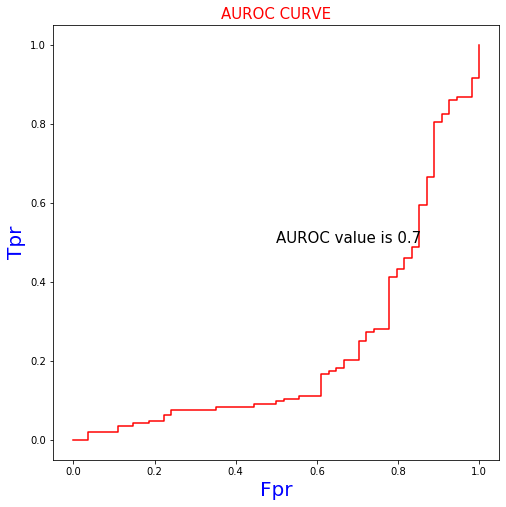

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.plot(fpr , tpr , color = "red")
plt.xlabel("Fpr" , size = 20 , color = "blue")
plt.ylabel("Tpr" , size = 20 , color = "blue")
plt.title("AUROC CURVE" , size = 15 , color = "red")
plt.text(x = .5 , y = .5 , size = 15 , s = "AUROC value is 0.7")